### 00) Importo librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn import preprocessing

In [2]:
#SK-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
#Scalers
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Modelos Lineales
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### 01) Importar Dataset de ejercicios a entregar

In [67]:
train = pd.read_csv(r"C:\Users\Usuario\Google Drive\2020\Utn\Ciencia de datos\Clases\clase_07\Ejercicio a entregar\Xy_train.csv", delimiter=',')
test = pd.read_csv(r"C:\Users\Usuario\Google Drive\2020\Utn\Ciencia de datos\Clases\clase_07\Ejercicio a entregar\X_test.csv", delimiter=',')

In [68]:
train.head()


,X,y
0,2.273360,6.054685
1,3.167583,4.581428
2,7.973655,5.392507
3,6.762547,3.108068
4,3.911096,4.225744


In [69]:
train.shape

(100, 2)

In [70]:
test.head()

,X
0,6.170800
1,6.302022
2,8.689293
3,2.376897
4,2.707320


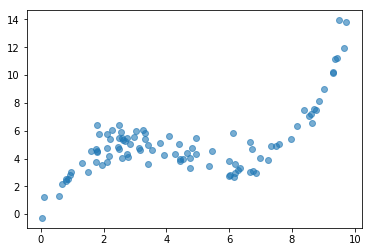

In [71]:
plt.scatter(train.X,train.y, alpha = 0.6)


In [72]:
train.isnull().sum() 

X    0
y    0
dtype: int64

In [73]:
#Creo un data frame para guardar los resultados de los modelos
resultados = pd.DataFrame(columns=['Modelo','R2','MSE','MAE'])

### 02) Pre procesar dataset.

In [74]:
x=train.iloc[:,0:1]
y=train.iloc[:,1:]

In [75]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=5)

In [76]:
#xtrain=np.array(xtrain)
#ytrain=np.array(ytrain)

In [77]:
## Definimos el escalador 
#scaler = MinMaxScaler() # Pueden probar con otros
## Fiteamos para los x_train
#scaler = scaler.fit(xtrain)

In [78]:
##polinomial features, combinaciones lineales de hasta grado n para ver si las features al cuadrado es mas lineal o se asemeja al a funcion
#grad_poly = 2
#train_poly_scal = PolynomialFeatures(grad_poly).fit_transform(xtrain)
#train_poly_scal.shape

In [79]:
#xtrain=xtrain.reshape(-1, 1)
#ytrain=ytrain.reshape(-1, 1)

In [80]:
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler
xtrain_scal = scaler.transform(xtrain)
xtest_scal = scaler.transform(xtest)

### 03) Segmentar las propiedades utilizando algoritmos de clustering. Como features deben usar todas las que crean necesarias. El objetivo es entender si existen estructuras que agrupen propiedades similares mas allá de las features de barrio o precios consideradas univariadamente, es decir aplicar clustering de manera multivariada considerando multiples features en simultáneo.

# Linear Regression

In [81]:
#Definimos el estimador
est = LinearRegression()
#Definimos diccionario con hyperparametros
parameters = {'fit_intercept' : [False, True]}
#Definimos la cantidad de folds para validar
n_folds = 4
#Definimos el objeto grid search con los parametros anteriores
gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, refit=True, scoring="neg_mean_squared_error")

In [82]:
#Entrenamos
gs.fit(xtrain_scal, ytrain)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [False, True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [83]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) 

{'fit_intercept': True} 

-3.6235486763576774 



In [84]:
# Usamos x_test para predecir con el mejor estimador
ypred = gs.best_estimator_.predict(np.array(ytest).reshape(-1, 1))

In [85]:
ypred

array([[11.52883237],
       [17.44961535],
       [11.53577846],
       [ 8.23849128],
       [ 9.45589478],
       [10.21302632],
       [10.57101095],
       [ 7.91938093],
       [12.26579301],
       [17.34988962],
       [19.54341508],
       [18.59863796],
       [12.91777723],
       [ 9.69708476],
       [12.07797045],
       [13.73764611],
       [11.99035721],
       [ 9.93067274],
       [11.17795242],
       [12.70602337]])

In [86]:
linear_prediction.tolist()

[[11.528832365025677],
 [17.44961535423567],
 [11.535778460883241],
 [8.238491284729687],
 [9.455894779973026],
 [10.21302632449826],
 [10.571010946100662],
 [7.919380929476855],
 [12.265793011621977],
 [17.349889617764852],
 [19.543415083596933],
 [18.598637955009604],
 [12.917777230643296],
 [9.697084761534184],
 [12.077970448359267],
 [13.737646106499628],
 [11.990357208841978],
 [9.930672743344234],
 [11.177952416365722],
 [12.706023366025502]]

In [87]:
mean_squared_error(ytest, ypred)

39.58138194759112

In [91]:
resultados = resultados.append({'Modelo':'LR',
                                'R2':np.sqrt(mean_squared_error(ytest, ypred),
                                'MSE':mean_squared_error(ytest, ypred),
                                'MAE':mean_absolute_error(ytest, ypred)},ignore_index=True)

SyntaxError: invalid syntax (<ipython-input-91-f9624e4327b8>, line 3)

# SVR

In [38]:
# Ahora cambiamos el estimador, usaremos SVR
est = SVR(max_iter=25000)
# Lista del parametro lambda (parametro 'alpha')
parameters = {'kernel':['rbf'],'C' : [40,45,50,55],
             'gamma':[2,3,4]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
n_folds = 5
gs = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [39]:
# Entrenamos
gs.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:    0.1s finished
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=25000, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'kernel': ['rbf'], 'C': [40, 45, 50, 55], 'gamma': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [40]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=45, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=3,
  kernel='rbf', max_iter=25000, shrinking=True, tol=0.001, verbose=False) 

{'C': 45, 'gamma': 3, 'kernel': 'rbf'} 

-0.5954450641861575 



In [44]:
# Prediccion + Metricas
svr_prediction = gs.best_estimator_.predict(xtest_scal)
svr_r2 = r2_score(y_true=ytest, y_pred=svr_prediction)
svr_mse = mean_squared_error(y_true=ytest, y_pred=svr_prediction)
svr_mae = mean_absolute_error(y_true=ytest, y_pred=svr_prediction)